In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
from tensorflow.keras.utils import to_categorical # 분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단,...
※ ML/DL의 종류
- 지도학습(독립=입력변수와 종속=타겟=출력변수가 모두 주어졌을 경우)
    회귀분석(타겟변수가 연속형) vs 분류분석(multi, binary)
- 비지도학습(입력변수만)
    군집화
- 강화학습

※ 지도학습에서의 ML, DL 프로그래밍 방식
1. 데이터 셋 확보(input=입력변수, target=종속변수)
    원본 데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리
    스케일 조정
    훈련셋(학습셋), 검증셋, 시험셋(테스트셋)
    학습 및 평가 가능한 포맷으로 변환
3. 모델 구성
    Sequential 객체 생성뒤 필요한 층을 add()함수로 추가
4. 모델 학습과정 설정
    compile()함수 이용. 손실함수, optimizer, metrics(평가지표)
5. 모델학습시키기 (ft. 학습과정 지켜보기)
    fit()함수 이용 - 훈련셋입력=독립변수, 훈련셋타겟=종속변수, 학습횟수, 검증셋
6. 모델 평가
    시험셋(테스트셋)을 인자로 넣은 evaluate()함수 이용, 그래프
7. 모델 사용
    predict() 이용. 입력데이터는 2차원 데이터
7. 모델 저장
    save()함수이용해서 저장. 저장된 모델은 load_model()함수를 이용해서 불러올 수 있음

# 1. 데이터 셋 생성
# 2. 데이터 전처리 

In [3]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 테스트셋 = 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [4]:
# 인코딩 종류
data = np.array(['a','b','c','d'])
print('원 데이터 :', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 :', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 :', one_hot_encoded_data)

원 데이터 : ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 : [0 1 2 3]
원핫인코딩된 데이터 : [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# 분류분석을 하기 위해, target을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 :\n', categorical_one_hot)
import pandas as pd
get_dumies_one_hot = pd.get_dummies(data)
display('get_dumies를 이용한 원핫인코딩 :', get_dumies_one_hot)
print(type(categorical_one_hot))
print(type(get_dumies_one_hot))

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 :
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dumies를 이용한 원핫인코딩 :'

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
# 분류분석을 위한 target변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val   = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [7]:
print('훈련셋 구조:', x_train.shape, Y_train.shape) # 독립변수1개, 타겟변수 19
print('검증셋 구조:', x_val.shape, Y_val.shape)
print('테스트셋 구조:', x_test.shape, Y_test.shape)

훈련셋 구조: (90,) (90, 19)
검증셋 구조: (9,) (9, 19)
테스트셋 구조: (9,) (9, 19)


# 3. 모델 구성하기

In [8]:
model = Sequential()
model.add(Input(shape=(1,))) # 입력층
model.add(Dense(units=38, activation='sigmoid')) # units출력수, 활성화함수:relu, tanh
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [9]:
model.compile(loss="categorical_crossentropy", # 분류분석에서의 손실함수(원핫인코딩有)
             optimizer='sgd',
             metrics=['accuracy']) # 평가지표 : accuracy 

# 5. 모델 학습시키기

In [10]:
hist = model.fit(x_train, Y_train, 
            epochs=300, 
            batch_size=10,
            verbose=2, # 학습결과 출력 옵션 0:출력없음. 1:기본값, 2:에포크별로그상세출력
            validation_data=(x_val, Y_val)
            )

Epoch 1/300
9/9 - 1s - loss: 2.8937 - accuracy: 0.0000e+00 - val_loss: 2.8241 - val_accuracy: 0.1111 - 659ms/epoch - 73ms/step
Epoch 2/300
9/9 - 0s - loss: 2.7926 - accuracy: 0.1111 - val_loss: 2.7340 - val_accuracy: 0.1111 - 36ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7088 - accuracy: 0.1111 - val_loss: 2.6607 - val_accuracy: 0.1111 - 36ms/epoch - 4ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6443 - accuracy: 0.1111 - val_loss: 2.5975 - val_accuracy: 0.1111 - 31ms/epoch - 3ms/step
Epoch 5/300
9/9 - 0s - loss: 2.5804 - accuracy: 0.2111 - val_loss: 2.5413 - val_accuracy: 0.1111 - 19ms/epoch - 2ms/step
Epoch 6/300
9/9 - 0s - loss: 2.5311 - accuracy: 0.1111 - val_loss: 2.4911 - val_accuracy: 0.1111 - 34ms/epoch - 4ms/step
Epoch 7/300
9/9 - 0s - loss: 2.4834 - accuracy: 0.1667 - val_loss: 2.4450 - val_accuracy: 0.2222 - 33ms/epoch - 4ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4347 - accuracy: 0.1667 - val_loss: 2.4021 - val_accuracy: 0.2222 - 33ms/epoch - 4ms/step
Epoch 9/300
9/9 - 0s - los

Epoch 69/300
9/9 - 0s - loss: 1.3867 - accuracy: 0.6333 - val_loss: 1.3527 - val_accuracy: 0.5556 - 20ms/epoch - 2ms/step
Epoch 70/300
9/9 - 0s - loss: 1.3706 - accuracy: 0.5889 - val_loss: 1.3435 - val_accuracy: 0.6667 - 39ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 1.3577 - accuracy: 0.5667 - val_loss: 1.3347 - val_accuracy: 0.5556 - 30ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 1.3474 - accuracy: 0.6111 - val_loss: 1.3254 - val_accuracy: 0.6667 - 30ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 1.3353 - accuracy: 0.5889 - val_loss: 1.3169 - val_accuracy: 0.5556 - 30ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 1.3409 - accuracy: 0.6111 - val_loss: 1.3080 - val_accuracy: 0.6667 - 29ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 1.3353 - accuracy: 0.5444 - val_loss: 1.3017 - val_accuracy: 0.7778 - 30ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 1.3251 - accuracy: 0.6667 - val_loss: 1.2917 - val_accuracy: 0.6667 - 30ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.9509 - accuracy: 0.8333 - val_loss: 0.9219 - val_accuracy: 0.7778 - 18ms/epoch - 2ms/step
Epoch 137/300
9/9 - 0s - loss: 0.9399 - accuracy: 0.7889 - val_loss: 0.9194 - val_accuracy: 0.8889 - 20ms/epoch - 2ms/step
Epoch 138/300
9/9 - 0s - loss: 0.9398 - accuracy: 0.7889 - val_loss: 0.9146 - val_accuracy: 1.0000 - 41ms/epoch - 5ms/step
Epoch 139/300
9/9 - 0s - loss: 0.9436 - accuracy: 0.8889 - val_loss: 0.9076 - val_accuracy: 0.8889 - 29ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 0.9322 - accuracy: 0.8444 - val_loss: 0.9047 - val_accuracy: 0.7778 - 30ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 0.9302 - accuracy: 0.8778 - val_loss: 0.9000 - val_accuracy: 0.7778 - 30ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 0.9193 - accuracy: 0.8000 - val_loss: 0.8966 - val_accuracy: 0.8889 - 30ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 0.9150 - accuracy: 0.8667 - val_loss: 0.8918 - val_accuracy: 0.8889 - 30ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.6851 - accuracy: 0.9556 - val_loss: 0.6570 - val_accuracy: 0.8889 - 30ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.7014 - accuracy: 0.8556 - val_loss: 0.6510 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.6713 - accuracy: 0.9778 - val_loss: 0.6500 - val_accuracy: 0.8889 - 31ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.6691 - accuracy: 0.9000 - val_loss: 0.6486 - val_accuracy: 0.8889 - 29ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.6762 - accuracy: 0.8889 - val_loss: 0.6425 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 208/300
9/9 - 0s - loss: 0.6620 - accuracy: 0.9556 - val_loss: 0.6360 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.6686 - accuracy: 0.8889 - val_loss: 0.6392 - val_accuracy: 0.8889 - 29ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.6678 - accuracy: 0.9111 - val_loss: 0.6308 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.5115 - accuracy: 0.9667 - val_loss: 0.4592 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 271/300
9/9 - 0s - loss: 0.4942 - accuracy: 0.9222 - val_loss: 0.4652 - val_accuracy: 1.0000 - 20ms/epoch - 2ms/step
Epoch 272/300
9/9 - 0s - loss: 0.4723 - accuracy: 0.9778 - val_loss: 0.4721 - val_accuracy: 0.8889 - 40ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.4706 - accuracy: 0.9556 - val_loss: 0.4486 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.4702 - accuracy: 1.0000 - val_loss: 0.4662 - val_accuracy: 0.8889 - 29ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.4781 - accuracy: 0.9444 - val_loss: 0.4473 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.4923 - accuracy: 0.9333 - val_loss: 0.4497 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.4666 - accuracy: 0.9778 - val_loss: 0.5079 - val_accuracy: 0.7778 - 30ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델학습과정 살펴보고, evalute)

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

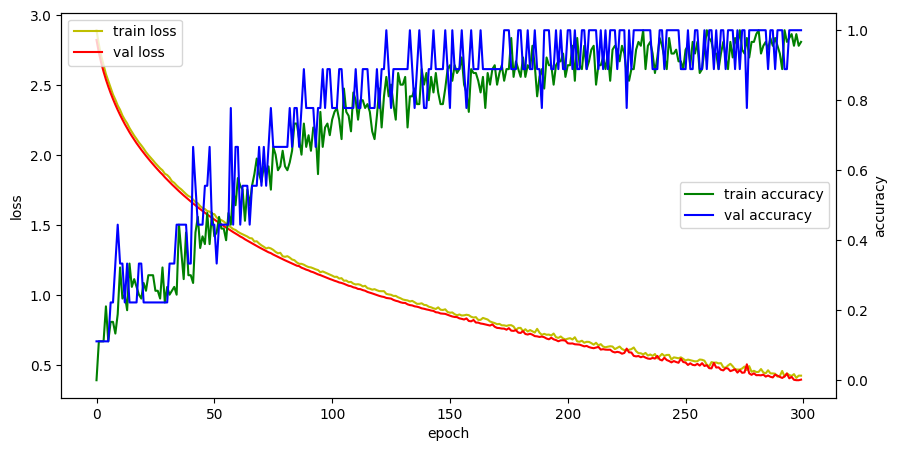

In [12]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [13]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 1.0000


In [14]:
score # loss, accuracy

[0.39843466877937317, 1.0]

In [15]:
print('평가된 loss :', score[0])
print('평가된 accuracy :', score[1]*100, '%')

평가된 loss : 0.39843466877937317
평가된 accuracy : 100.0 %


# 7. 모델 사용하기

In [16]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 73ms/step


array([[5.0581504e-11, 2.3182625e-13, 8.1720121e-02, 2.5609425e-14,
        8.3027017e-01, 1.9926313e-14, 8.7294288e-02, 7.1244066e-11,
        7.1445445e-04, 2.4413425e-15, 1.0759084e-06, 1.9864008e-10,
        1.2204340e-10, 2.3940770e-15, 2.2633400e-15, 8.6683177e-14,
        1.1095046e-21, 7.7152007e-11, 2.4329568e-30]], dtype=float32)

In [17]:
# 분류분석의 예측은 predict()후 argmax()
model.predict(np.array([[2]])).argmax() 

1/1 [==============================] - 0s 26ms/step


4

In [18]:
# 4를 몇%확률로 예측했는지 
H[0, H.argmax()]*100

83.02701711654663

# 7. 모델 저장하기

In [19]:
# model.save('model/02_deep.h5')
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

## 저장된 모델 사용하기

In [22]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5')

In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


In [31]:
data = np.array([[2], 
                 [3]])
predictions = model2.predict(data)
predictions.argmax(axis=-1)

1/1 [==============================] - 0s 47ms/step


array([4, 6], dtype=int64)

In [32]:
def predict_classes(model, data):
    predictions = model.predict(data)
    return predictions.argmax(axis=-1)

In [36]:
import tensorflow as tf
@tf.function(reduce_retracing=True)
def predict_classes(model, data):
    predictions = model(data, training=False)
    return tf.argmax(predictions, axis=-1)

In [37]:
import numpy as np
input_data = int(input('어떤 데이터를 예측할까요?'))
data = np.array([[input_data]])
print('예측된 분류는', predict_classes(model2, data))

어떤 데이터를 예측할까요?3
예측된 분류는 tf.Tensor([6], shape=(1,), dtype=int64)
